# Exercises

  1. Create a Python module, which consists of a class TextContainer. The class shall implement methods for computing statistics on texts.
    * Counting the amount of words used in a text.
    * Counting the amount of chars used in a text.
    * Counting the amount of letters, where letters are all ASCII letter characters, see 
    ```python
    import string
    string.ascii_letters  # returns 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'
    ```
    * Remove all punctuation characters, see
    ```python
    import string
    string.punctuation  # returns '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
import string

class TextContainer():
    
    def __init__(self, text):
        self.text = text
        
    def numOfWords(self):
        return len(self.text.split())
        
    def charsInText(self):
        return len(self.text.replace(' ', ''))

    def asciiInText(self):
        return sum(c in string.ascii_letters for c in self.text)
    
text = TextContainer('
This is a text')
print(text.numOfWords())
print(text.charsInText())
print(text.asciiInText())

SyntaxError: EOL while scanning string literal (<ipython-input-14-22f01062dec3>, line 17)

## Class exercise
with the following dataset:  

`student_attendance = {'day1':33, 'day2':34,'day3':29,'day4':31,'day5':28,'day6':26,'day7':30}`

1. create a line graph showing attendance over time.
**hint:** use keys() and values() method of the dictionary.  
2. add title and labels for x and y axis.



<IPython.core.display.Javascript object>


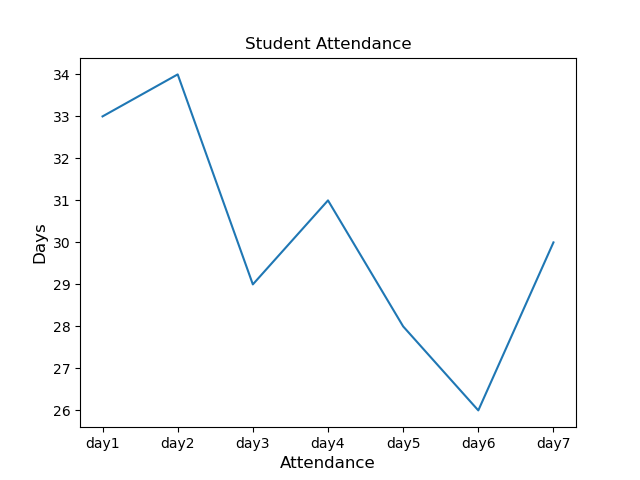

In [15]:
%matplotlib notebook
# %matplotlib notebook necessary to show the plot in ipython notebook (or use plt.show())
import matplotlib.pyplot as plt

student_attendance = {'day1':33, 'day2':34,'day3':29,'day4':31,'day5':28,'day6':26,'day7':30}
plt.plot(list(student_attendance.keys()), list(student_attendance.values()))
plt.title("Student Attendance", fontsize=12)
plt.xlabel("Attendance", fontsize=12)
plt.ylabel("Days", fontsize=12)

plt.show()


# Exercise for the 3rd course week

## Ex 1 Classes
1. Create 3 classes: Student, DataSheet and Course
2. A student has a data_sheet and a data_sheet has multiple courses in particular order
3. Each course has name, classroom, teacher, ETCS and optional grade if course is taken.
4. In Student create __init__() so that a Student can be initiated with name, gender, data_sheet and image_url
5. In DataSheet create a method to get_grades_as_list()
6. In student create a method: get_avg_grade()
7. Create a function that can generate n number of students with random: name, gender, courses (from a fixed list of course names), grades, img_url
   1. Let the function write the result to a csv file with format stud_name, course_name, teacher, ects, classroom, grade, img_url
7. Read student data into a list of Students from a csv file: 
   1. loop through the list and print each student with name, img_url and avg_grade.
   2. sort the list by avg_grade
   3. create a bar chart with student_name on x and avg_grade on y-axis
8. Make a method on Student class that can show progression of the study in % (add up ECTS from all passed courses divided by total of 150 total points (equivalent to 5 semesters))
9. Show a bar chart of distribution of study progression on x-axis and number of students in each category on y-axis. (e.g. make 10 categories from 0-100%)

Extra: Make the Datasheet class iterable so that next(data_sheet) will return the next course in the list

In [17]:
from enum import Enum
import math

class Gender(Enum):
    MALE='male'
    FEMALE='female'


class Student():
    def __init__(self, name, gender, data_sheet, image_url):
        self.name = name
        self.gender = gender
        self.data_sheet = data_sheet
        self.image_url = image_url

    def __str__(self):
        return '{name} {img} {avg}'.format(
            name=self.name, img=self.image_url, avg=str(math.ceil(self.get_avg_grade(), 2)))

    def __repr__(self):
        return '{name} {img} {avg}'.format(
            name=self.name, img=self.image_url, avg=str(self.get_avg_grade()))  

    def get_avg_grade(self):
        grade_list = [int(grade) for grade in self.data_sheet.get_grades_as_list()]
        return sum(grade_list) / len(grade_list)
        
    def get_progression(self):
        return (sum([int(course.ects) for course in self.data_sheet.courses]) / 150) * 100
        
class DataSheet():
    def __init__(self, courses):
        self.courses = courses
        
    def get_grades_as_list(self):
        return [course.grade for course in self.courses]
    
class Course():
    def __init__(self, name, classroom, teacher, ects, grade):
        self.name = name
        self.classroom = classroom
        self.teacher = teacher
        self.ects = ects
        self.grade = grade

In [18]:
import names
import random

def generate_students(numberOfStudents):
    genders = ['Male', 'Female']
    courses = ['Python', 'FSJS', 'IOT', 'Security', 'Kotlin', 'Functional Programming']
    teachers = ['Thomas', 'Lars', 'Tobias', 'Daniel', 'Anders', 'Joe']
    classRooms = ['CL-1', 'CL-2', 'CL-3', 'CL-4', 'CL-5', 'CL-6']
    grades = [0, 2, 4, 7, 10, 12]

    generated_students = []
    for i in range(0, numberOfStudents):
        numberOfCourses = random.randint(1, len(courses))
        student_courses = []
        for i in range(0, numberOfCourses):  
            r_choice = numberOfCourses = random.randint(1, len(courses)-1)
            student_courses.append(Course(courses[r_choice], classRooms[r_choice], teachers[r_choice], 10, random.choice (grades)))
        data_sheet = DataSheet(student_courses)
        generated_students.append(Student(names.get_first_name(), random.choice(genders), data_sheet, 'someUrl'))
    return generated_students

In [19]:
import csv
import platform

if platform.system() == 'Windows':
    newline=''
else:
    newline=None

def write_to_csv(output_file, student_list):
    with open(output_file, 'w+', newline=newline) as out_file:
        writer = csv.writer(out_file, delimiter='\t')
        for s in student_list:
            for c in s.data_sheet.courses:
                writer.writerow([s.name, s.gender, c.name, c.teacher, c.classroom, c.ects, c.grade, s.image_url])

def read_from_csv(input_file):
    read_students = []
    with open(input_file) as in_file:
        reader = csv.reader(in_file, delimiter='\t')
        previous_student = None
        tmp_courses = []
        for row in reader:
            curr_student = Student(*row[0:2], _, row[7])
            curr_course = Course(*row[2:7])
            if previous_student is None or curr_student.name == previous_student.name:
                tmp_courses.append(curr_course)
            else:
                previous_student.data_sheet = DataSheet(tmp_courses)
                read_students.append(previous_student)
                tmp_courses = [curr_course]
            previous_student = curr_student
        previous_student.data_sheet = DataSheet(tmp_courses)
        read_students.append(previous_student) 
    return read_students

In [20]:
write_to_csv('./data/students.csv', generate_students(10))

In [21]:
print(read_from_csv('./data/students.csv'))

[Kevin someUrl 9.333333333333334, Cecil someUrl 4.0, Steven someUrl 7.833333333333333, Jeff someUrl 4.0, Donald someUrl 6.0, Zina someUrl 12.0, Cheryl someUrl 6.0, Babara someUrl 7.0, Harold someUrl 9.5, Dolores someUrl 4.75]


In [22]:
def sort_students_by_avg_grade(students):
    return sorted(students, key=lambda student: student.get_avg_grade(), reverse=True)

sort_students_by_avg_grade(read_from_csv('./data/students.csv'))

[Zina someUrl 12.0,
 Harold someUrl 9.5,
 Kevin someUrl 9.333333333333334,
 Steven someUrl 7.833333333333333,
 Babara someUrl 7.0,
 Donald someUrl 6.0,
 Cheryl someUrl 6.0,
 Dolores someUrl 4.75,
 Cecil someUrl 4.0,
 Jeff someUrl 4.0]

<IPython.core.display.Javascript object>


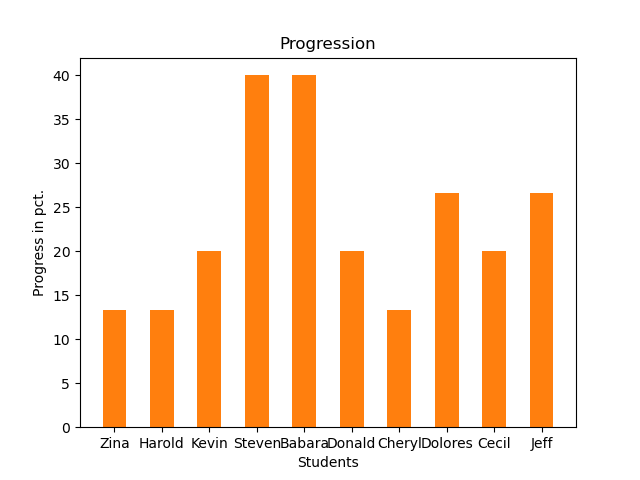

In [23]:
%matplotlib notebook
import matplotlib.pyplot as plt

def plot_students_bar(students):
    sorted_students = sort_students_by_avg_grade(students)
    names = [student.name for student in sorted_students]
    grades = [student.get_avg_grade() for student in sorted_students]
    plt.bar(names, grades, width=0.5, align='center')
    plt.title('Avg. Grades', fontsize=12)
    plt.xlabel('Students', fontsize=10)
    plt.ylabel('Avg Grades', fontsize=10)
    plt.show()

plot_students_bar(read_from_csv('./data/students.csv'))

<IPython.core.display.Javascript object>


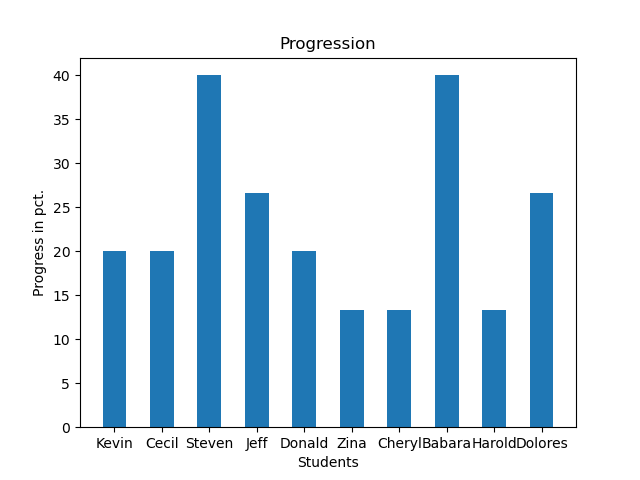

In [25]:
%matplotlib notebook
import matplotlib.pyplot as plt

def plot_student_progression(students):
    names = [student.name for student in students]
    progression = [student.get_progression() for student in students]
    plt.bar(names, progression, width=0.5, align='center')
    plt.title('Progression', fontsize=12)
    plt.xlabel('Students', fontsize=10)
    plt.ylabel('Progress in pct.', fontsize=10)
    plt.show()

plot_student_progression(read_from_csv('./data/students.csv'))
